In [108]:
data <- read.csv(file.path("..","data","training_data.csv"))
data <- na.omit(data)
dim(data)
data


[1]  708 4872

Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,...,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,...,0,0,1,0,1,0,1,0,1,0
high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,...,0,0,0,0,0,0,0,0,0,0
high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,...,0,0,1,0,1,1,1,0,1,1
high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,...,0,0,0,0,0,0,0,0,0,0
low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,...,0,0,0,0,0,0,0,0,0,0
high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,...,0,0,0,0,1,0,1,0,1,0
low,56,FALSE,116.0,170.22,7.401,15.349,22.745,16.261,25.285,...,0,0,0,0,1,0,0,0,1,0
low,52,FALSE,25.0,114.26,4.395,12.741,24.952,14.853,29.737,...,0,0,0,0,0,0,0,0,0,0
low,53,TRUE,355.0,268.30,7.666,21.304,36.025,21.614,39.950,...,0,0,1,0,1,1,1,1,1,1
low,1,FALSE,68.4,152.26,9.516,9.911,16.342,11.250,17.920,...,0,0,0,0,0,0,0,0,0,0


In [87]:
length(data[, 1])

[1] 708

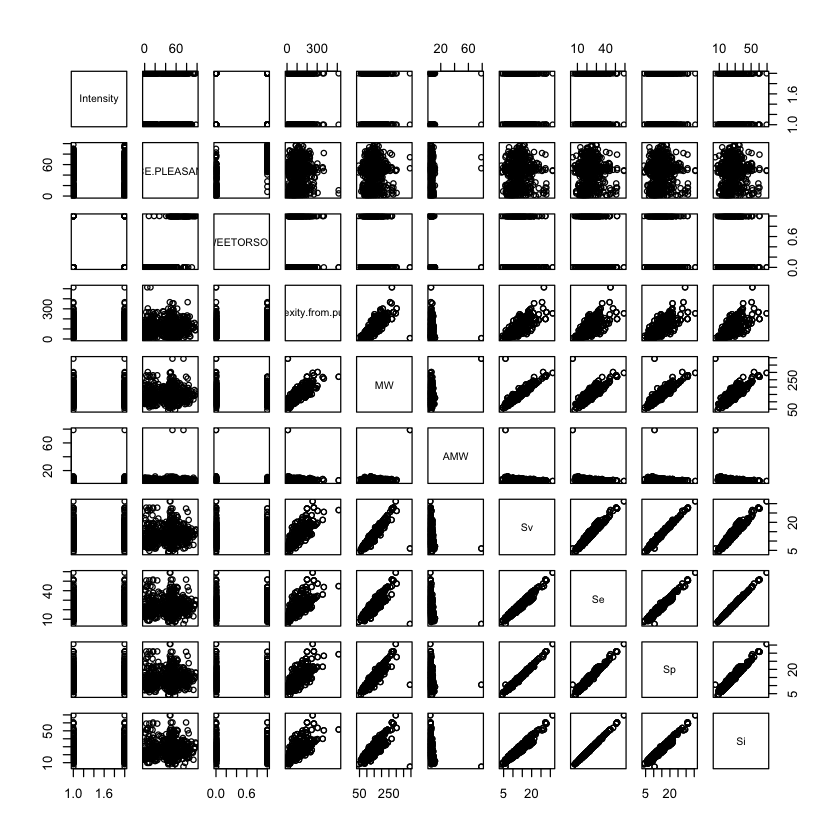

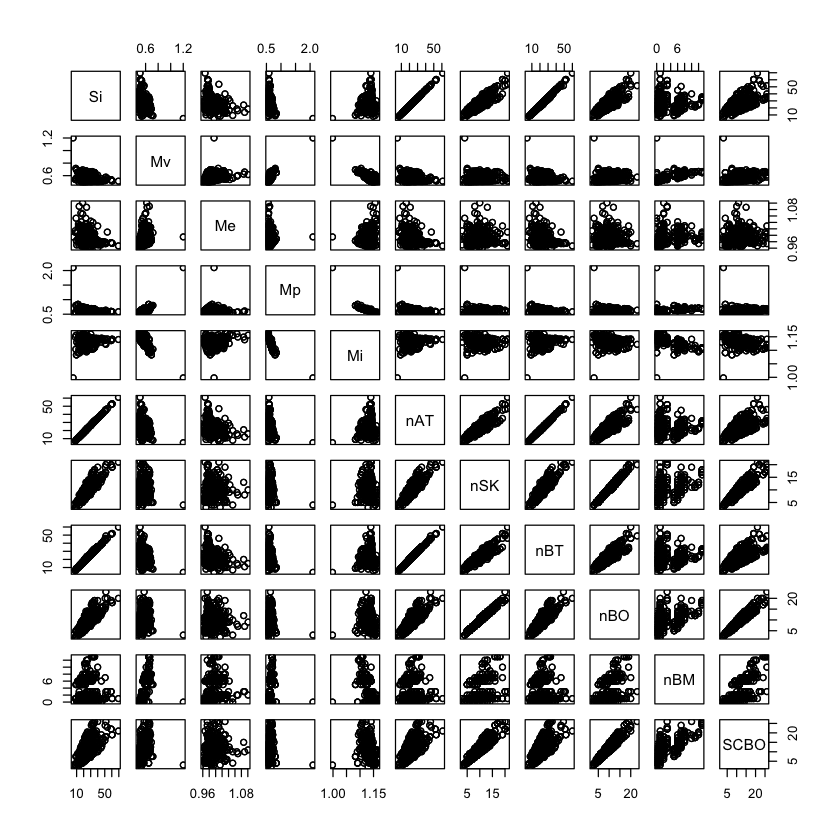

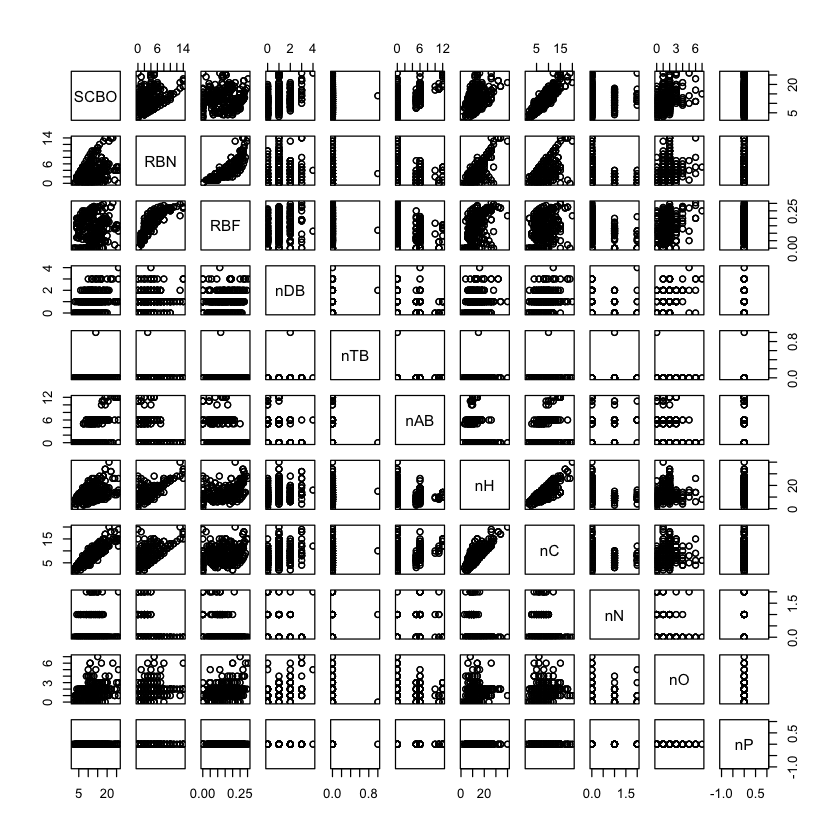

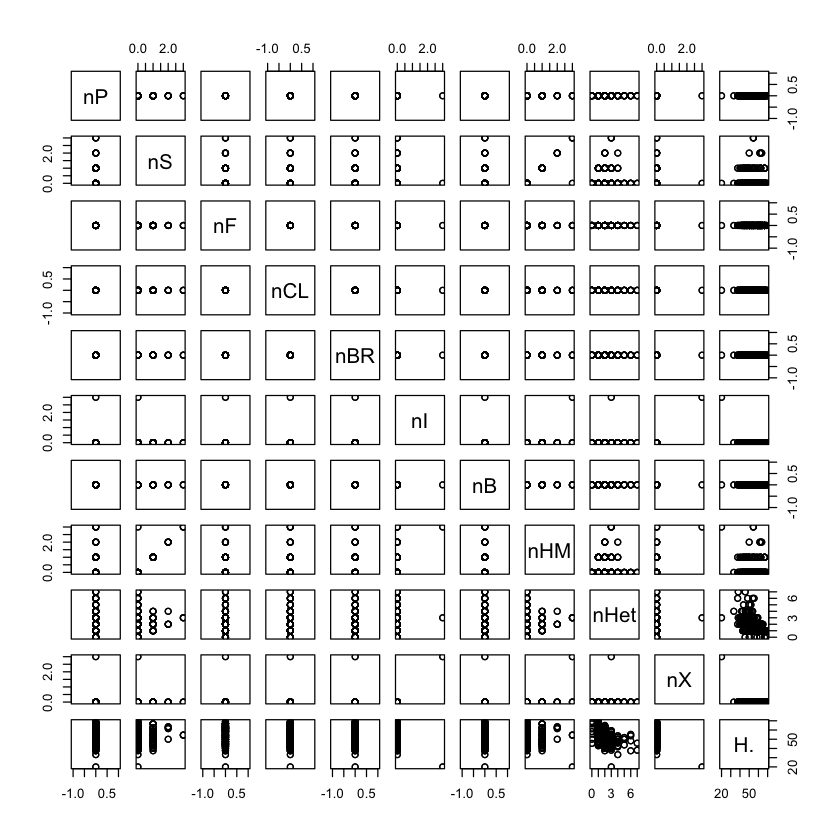

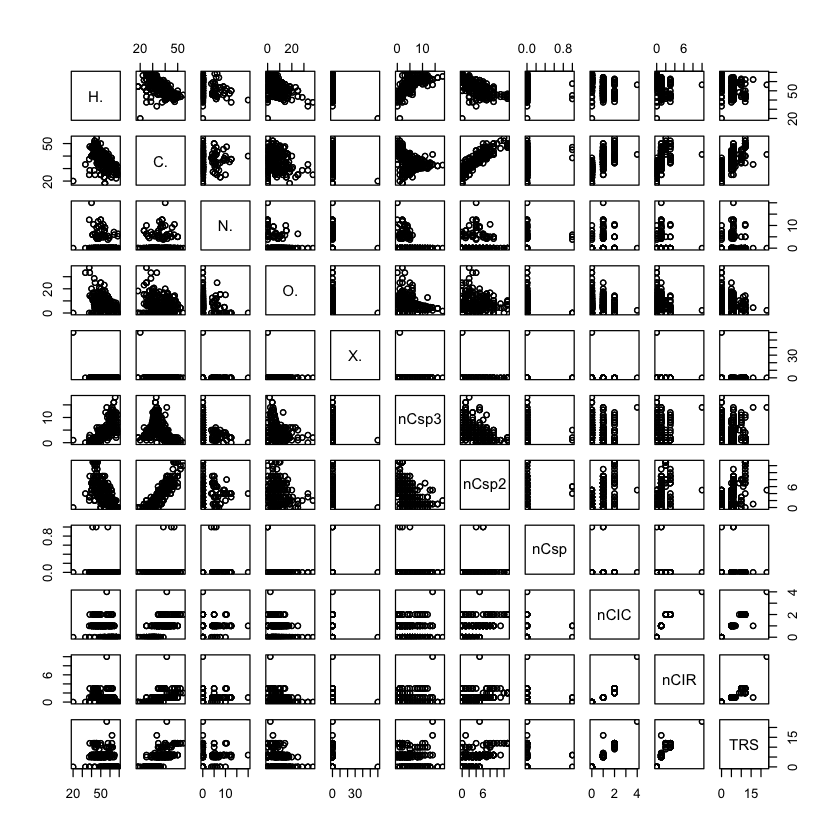

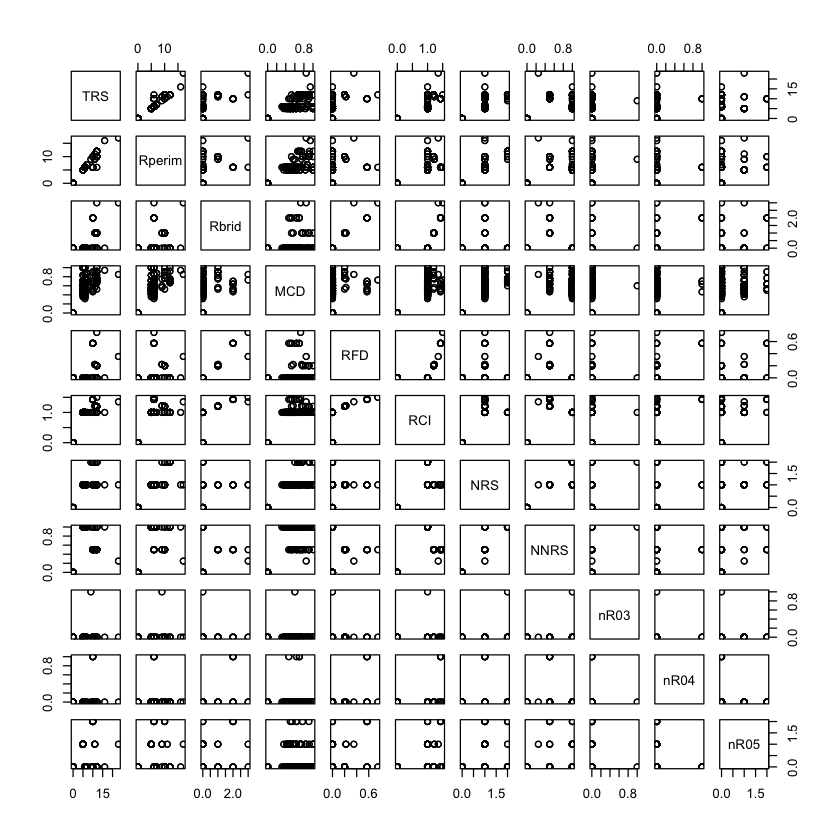

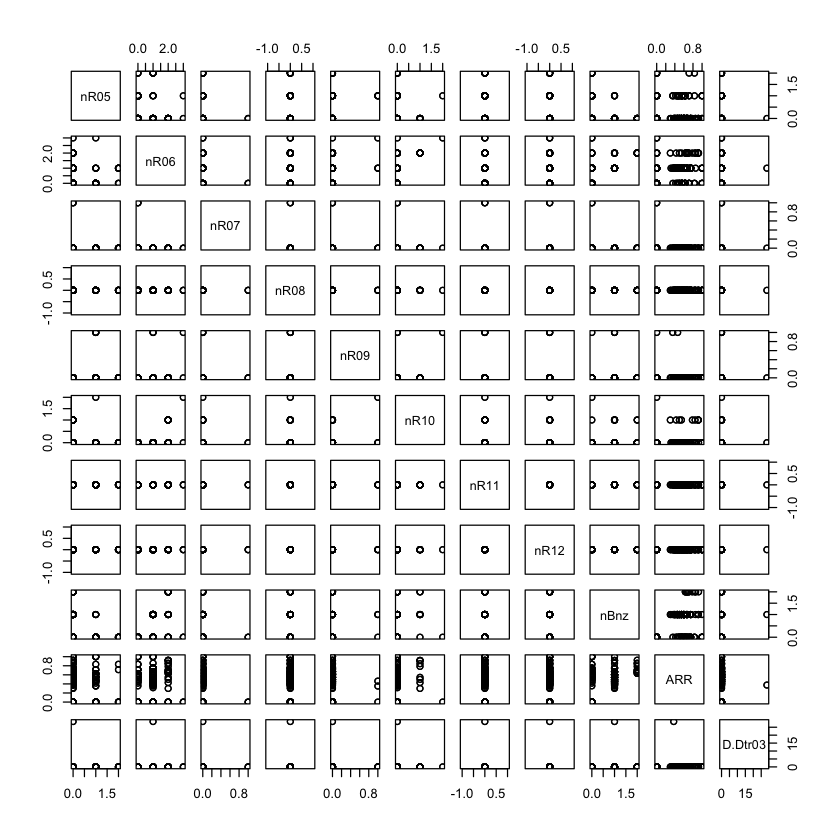

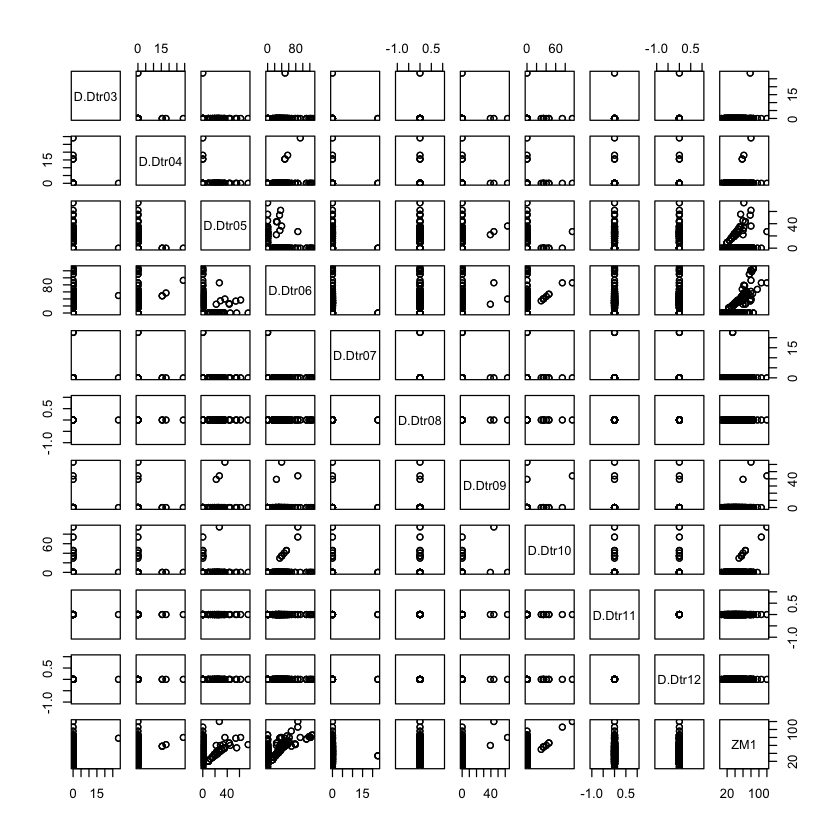

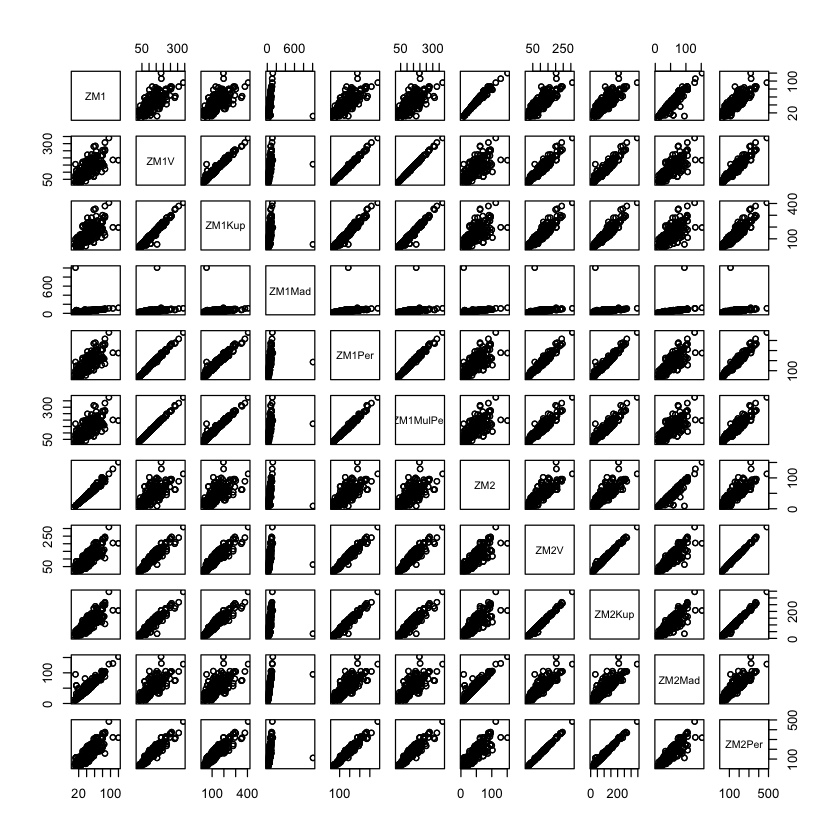

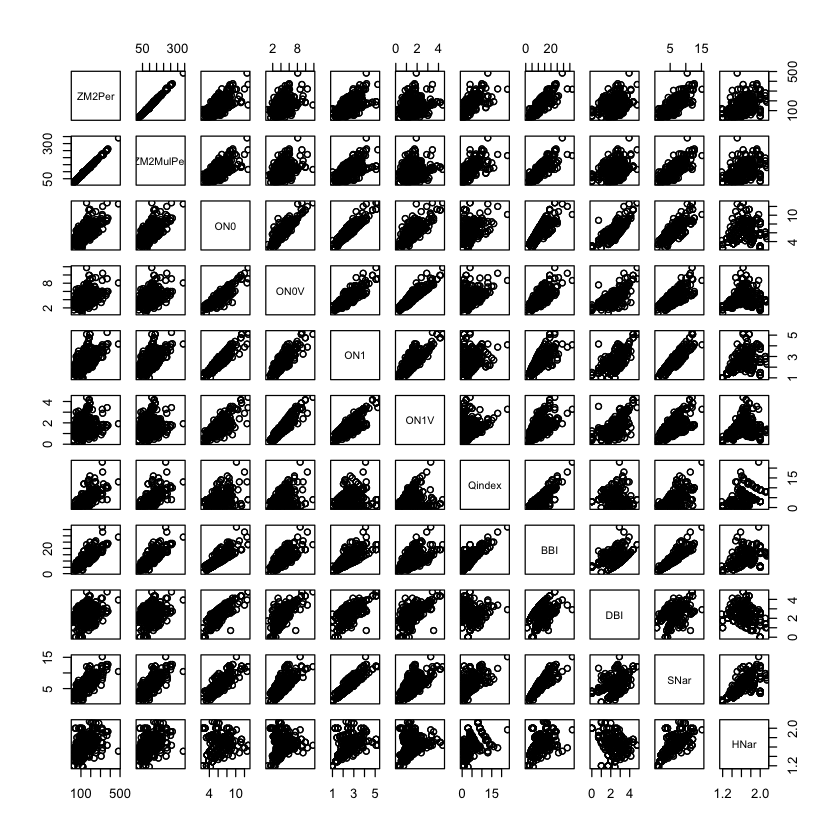

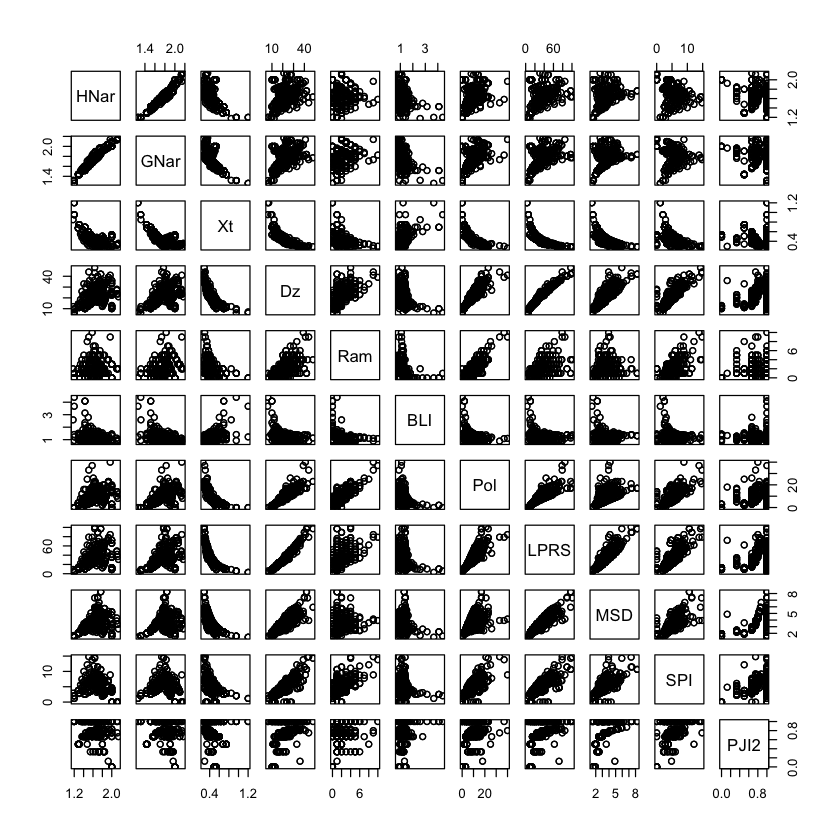

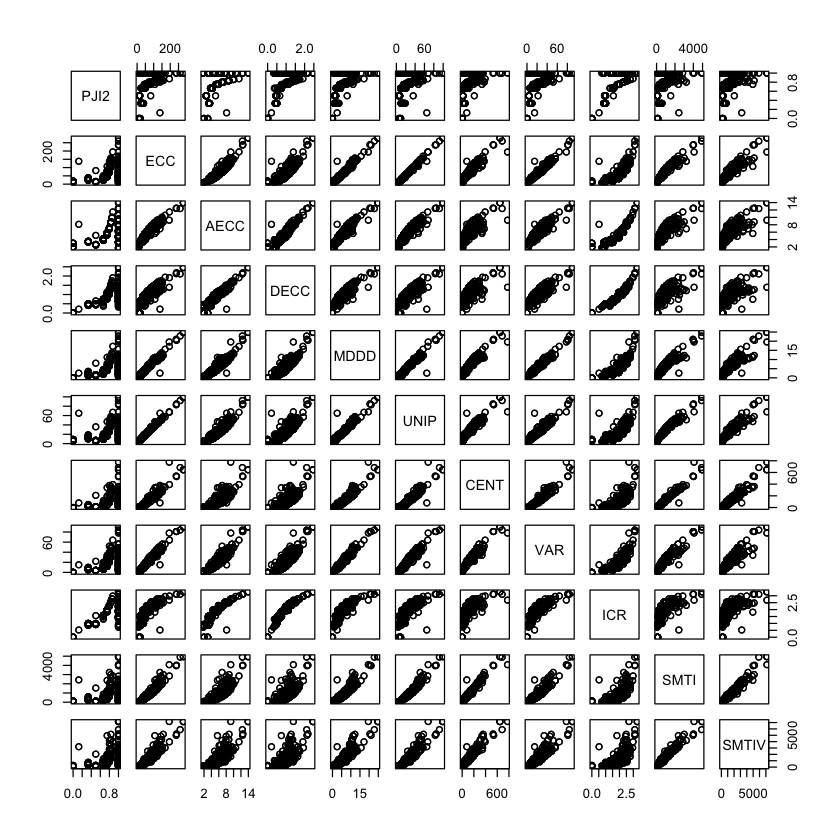

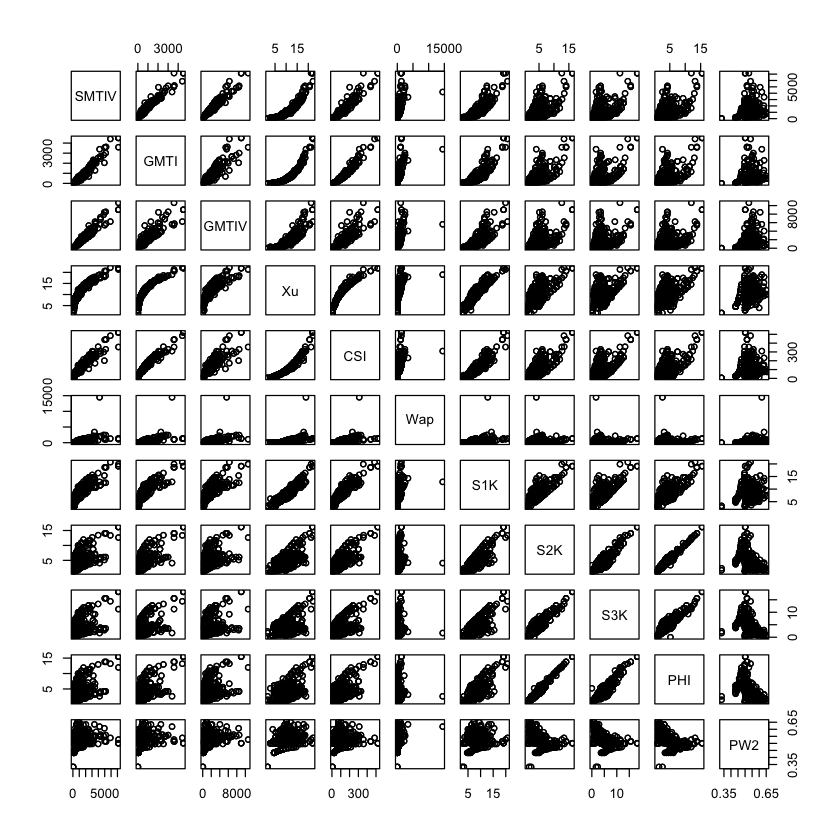

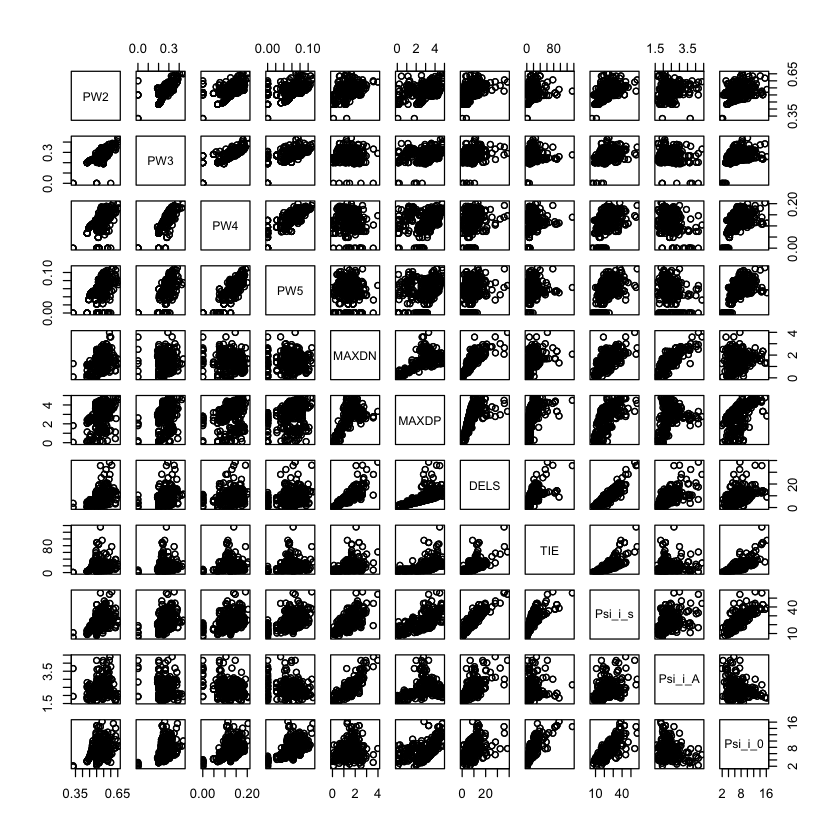

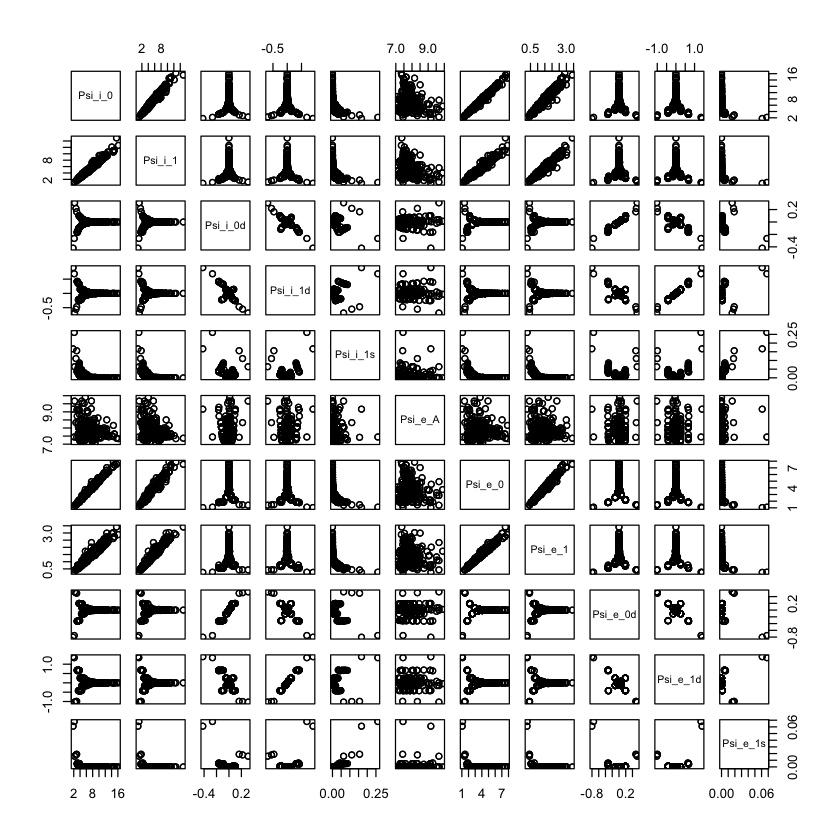

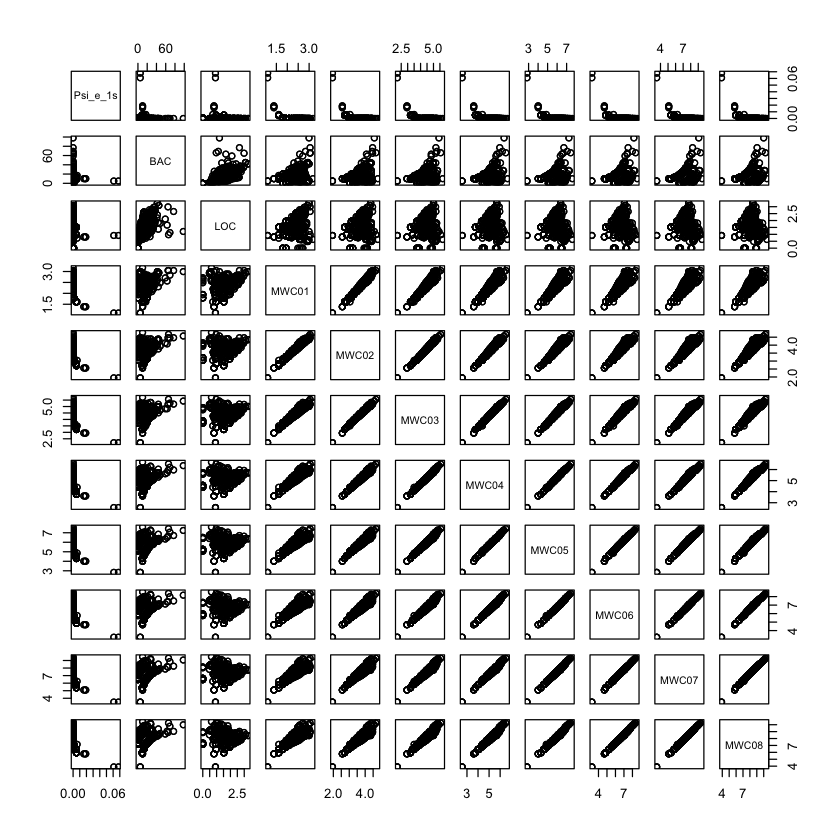

In [71]:

#colnames(data) <- c("Cultivar","Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline")

pairs (data[, 1:10], cex=.9)
pairs (data[ , 10:20])
pairs (data[ , 20:30])
pairs (data[ , 30:40])
pairs (data[, 40:50], cex=.9)
pairs (data[ , 50:60])
pairs (data[ , 60:70])
pairs (data[ , 70:80])
pairs (data[, 80:90], cex=.9)
pairs (data[ , 90:100])
pairs (data[ , 100:110])
pairs (data[ , 110:120])
pairs (data[, 120:130], cex=.9)
pairs (data[ , 130:140])
pairs (data[ , 140:150])
pairs (data[ , 150:160])




ERROR: Error in plot.new(): figure margins too large


Warning message:
“In prcomp.default(data.sc, data = F) :
 extra argument ‘data’ will be disregarded”

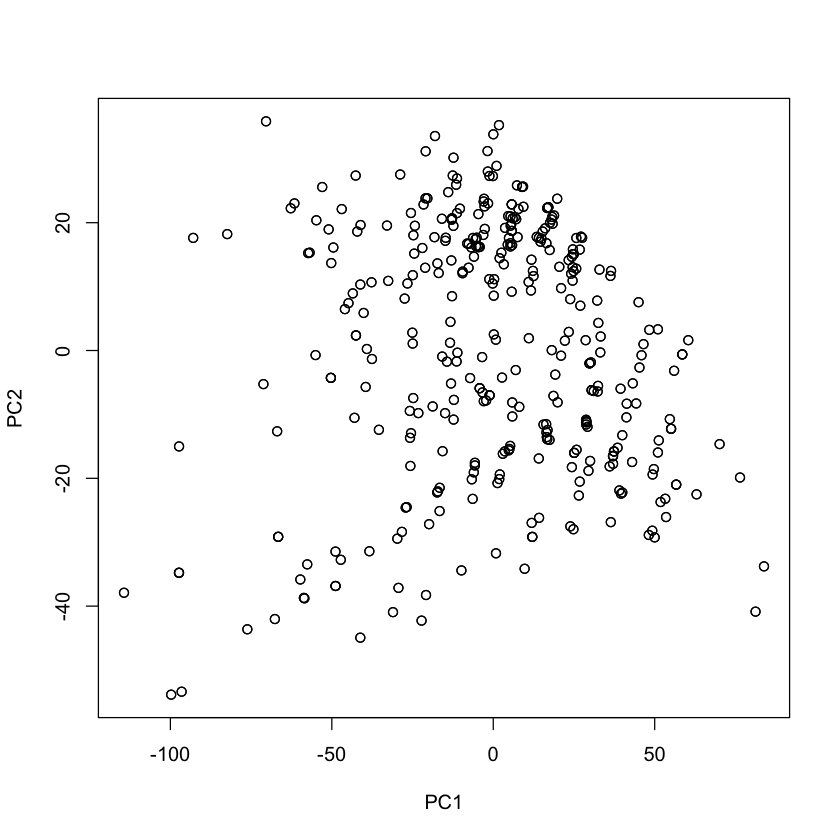

In [110]:
data.sc <- scale(data[, 2:4871]) #remove non numeric data and prediction data(), on fais quoi qvec intensity and sweetorSour ?
data.sc<- data.sc[, which(apply(data.sc, 2, var)!=0)] #remove zero-variance column
pca <- prcomp(data.sc, data= F)
plot(pca$x[,1:2])

In [50]:
s <- svd(data.sc)
sum((s$v - pca$rotation)^2)
sum((s$u %*% diag(s$d) - pca$x)^2)

[1] 747.368

[1] 1.668568e-21